In [2]:
import numpy as np
import pandas as pd

In [3]:
folder_path = "/home/olga/CAB/NRP/data/Test/TestDB/"
ans_path = folder_path + "ans.csv"

ans_pairs = set()
peptide = dict()
genome = dict()

In [4]:
ans_df = pd.read_csv(ans_path)
for index, row in ans_df.iterrows():
    ans_pairs.add((row["peptide"], row["organism"]))

In [5]:
def addInfoPeptide(info_path):
    with open(info_path) as f:
        for row in f:
            peptide[row.split()[0].split('/')[-1][:-4]] = row.split()[-1]
            
def addInfoGenome(info_path):
    with open(info_path) as f:
        for row in f:
            genome[row.split()[0]] = row.split()[1]
        

In [6]:
for folder in ["dataset1", "dataset2", "dataset3"]:
    addInfoPeptide(folder_path + folder + "/structure_filter.info")
    addInfoGenome(folder_path + folder + "/prediction_filter.info")

In [7]:
def getMolId(path):
    last = path.split('/')[-1]
    if ("gr" in last):
        last = last[:-3]
    return last

In [8]:
def getPredictionId(path):
    parts = path.split('/')
    idd = parts[0]
    for part in parts:
        if "GCF" in part:
            idd = part.split('genomic')[0] + "genomic"
    return idd

In [9]:
def isWrong(idMol, idPred):
    return (peptide[idMol], genome[idPred]) not in ans_pairs

In [10]:
def getScoreList(res_file_name):
    res_df = pd.read_csv(res_file_name)
    res = []
    for index, row in res_df.iterrows():
        res.append((float(row["score"]), isWrong(getMolId(row["mol id"]), getPredictionId(row["prediction id"])), 
                   getMolId(row["mol id"]), getPredictionId(row["prediction id"])))
    res.sort()
    res = res[::-1]
    return res

In [11]:
def FDR(mergelist):
    curOne = 0

    cntElem = []
    FDR = []
    
    elemCnt = min(len(mergelist), 100)
    for i in range(elemCnt):
        if (i > 0 and mergelist[i - 1][0] != mergelist[i][0]):
            cntElem.append(i)# - curOne)
            FDR.append(curOne/i)
        curOne += mergelist[i][1]

    cntElem.append(elemCnt)
    FDR.append(curOne/elemCnt)
    
    return cntElem, FDR

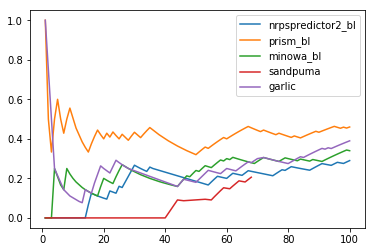

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline 

for folder in ["dataset1"]:#, "dataset2", "dataset3"]:
    #x1, y1 = FDR(getScoreList(folder_path + folder + "/minowa.csv"))
    #plt.plot(x1, y1, label="minowa")
    
    #x2, y2 = FDR(getScoreList(folder_path + folder + "/prism.csv"))
    #plt.plot(x2, y2, label="prism")
    
    #x3, y3 = FDR(getScoreList(folder_path + folder + "/nrpspredictor2.csv"))
    #plt.plot(x3, y3, label="nrpspredictor2")
    
    x4, y4 = FDR(getScoreList(folder_path + folder + "/nrpspredictor2_bl.csv"))
    plt.plot(x4, y4, label="nrpspredictor2_bl")
    
    x5, y5 = FDR(getScoreList(folder_path + folder + "/prism_bl.csv"))
    plt.plot(x5, y5, label="prism_bl")
    
    x6, y6 = FDR(getScoreList(folder_path + folder + "/minowa_bl.csv"))
    plt.plot(x6, y6, label="minowa_bl")
    plt.legend()
    
    
    x7, y7 = FDR(getScoreList(folder_path + folder + "/sandpuma.csv"))
    plt.plot(x7, y7, label="sandpuma")
    plt.legend()
    
    x8, y8 = FDR(getScoreList(folder_path + folder + "/garlic.csv"))
    plt.plot(x8, y8, label="garlic")
    plt.legend()
    

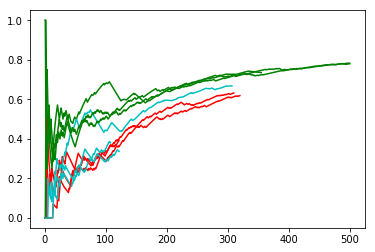

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline 

for folder in ["dataset1", "dataset2", "dataset3"]:
    x1, y1 = FDR(getScoreList(folder_path + folder + "/minowa.csv"))
    plt.plot(x1, y1, label="minowa", color="r")
    
    x2, y2 = FDR(getScoreList(folder_path + folder + "/prism.csv"))
    plt.plot(x2, y2, label="prism", color="g")
    
    x3, y3 = FDR(getScoreList(folder_path + folder + "/nrpspredictor2.csv"))
    plt.plot(x3, y3, label="nrpspredictor2", color="c")
    #plt.legend()

In [33]:
folder = "dataset1"
for predictor in ["minowa", "prism", "nrpspredictor2"]:
    score_list = getScoreList(folder_path + folder + "/" + predictor + ".csv")
    print(predictor)
    cntWrong = 0
    i = 0
    while cntWrong < 10:
        if score_list[i][1] == True:
            print(i, score_list[i][0], score_list[i][2], score_list[i][3])
            cntWrong += 1        
        i += 1

minowa
3 7.99309 antimarin2012_26949 GCF_000010165.1_ASM1016v1_genomic
7 6.994689999999999 antimarin2012_26949 GCF_002215075.1_ASM221507v1_genomic
18 5.7243699999999995 mibig_682 GCF_000988485.1_ASM98848v1_genomic
19 5.68372 antimarin2012_26949 GCF_000255295.1_ASM25529v1_genomic
23 5.46279 QCP30-L GCF_002202015.1_ASM220201v1_genomic
24 5.4562 mibig_682 GCF_001708425.1_ASM170842v1_genomic
25 5.41604 antimarin2012_35777 GCF_000517305.1_ASM51730v1_genomic
44 4.988 OTG26-O GCF_000219535.2_ASM21953v3_genomic
45 4.98525 BOW79-M GCF_000218915.1_ASM21891v1_genomic
46 4.9663900000000005 antimarin2012_50943 GCF_000219535.2_ASM21953v3_genomic
prism
0 16.1146 antimarin2012_26949 GCF_000010165.1_ASM1016v1_genomic
3 12.075 antimarin2012_26949 GCF_002215075.1_ASM221507v1_genomic
4 11.9522 QYN99-A GCF_000219535.2_ASM21953v3_genomic
7 10.2888 QYN99-A GCF_000010165.1_ASM1016v1_genomic
8 10.2122 antimarin2012_50943 GCF_000219535.2_ASM21953v3_genomic
15 9.3918 antimarin2012_28307 GCF_000198775.1_ASM19877v

In [14]:
def getDecoyScoreList(res_file_name):
    res_df = pd.read_csv(res_file_name)
    res = []
    for index, row in res_df.iterrows():
        is_wrong = 0
        if "decoy" in row["mol id"]:
            is_wrong = 1
            
        res.append((float(row["score"]), is_wrong, 
                   getMolId(row["mol id"]), getPredictionId(row["prediction id"])))
    res.sort()
    res = res[::-1]
    print(res)
    return res

[(5.471830000000001, 0, 'CLH67-A', 'GCF_000023865.1_ASM2386v1_genomic'), (5.209309999999999, 0, 'antimarin2012_29778', 'GCF_000023865.1_ASM2386v1_genomic'), (5.209309999999999, 0, 'antimarin2012_26728', 'GCF_000023865.1_ASM2386v1_genomic'), (4.0000599999999995, 0, 'mibig_607', 'GCF_000023865.1_ASM2386v1_genomic'), (3.48275, 0, 'antimarin2012_37582', 'GCF_002162355.1_ASM216235v1_genomic'), (3.48275, 0, 'antimarin2012_37581', 'GCF_002162355.1_ASM216235v1_genomic'), (3.28935, 0, 'antimarin2012_35881', 'GCF_002162355.1_ASM216235v1_genomic'), (3.2835400000000003, 1, 'decoy64', 'GCF_001027285.1_ASM102728v1_genomic'), (3.15138, 1, 'decoy1579', 'GCF_000418325.1_ASM41832v1_genomic'), (3.08691, 1, 'decoy64', 'GCF_002162355.1_ASM216235v1_genomic'), (3.0821400000000003, 1, 'decoy1604', 'GCF_002162355.1_ASM216235v1_genomic'), (2.92945, 0, 'mibig_597', 'GCF_002162355.1_ASM216235v1_genomic'), (2.6974299999999998, 0, 'antimarin2012_49272', 'GCF_002162355.1_ASM216235v1_genomic'), (2.6013900000000003, 0

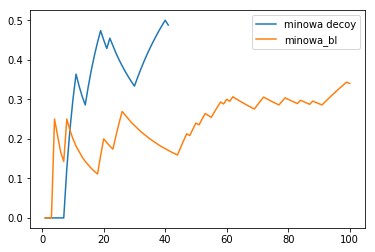

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 

for folder in ["dataset1"]:#, "dataset2", "dataset3"]:
    x1, y1 = FDR(getDecoyScoreList(folder_path + folder + "/minowa_decoy.csv"))
    plt.plot(x1, y1, label="minowa decoy")
    plt.legend()
    
    x6, y6 = FDR(getScoreList(folder_path + folder + "/minowa_bl.csv"))
    plt.plot(x6, y6, label="minowa_bl")
    plt.legend()
    

In [19]:
folder = "dataset1"
for predictor in ["minowa_decoy"]:
    score_list = getDecoyScoreList(folder_path + folder + "/" + predictor + ".csv")
    print(predictor)
    cntWrong = 0
    i = 0
    while cntWrong < 10:
        if score_list[i][1] == True:
            print(i, score_list[i][0], score_list[i][2], score_list[i][3])
            cntWrong += 1        
        i += 1

[(5.471830000000001, 0, 'CLH67-A', 'GCF_000023865.1_ASM2386v1_genomic'), (5.209309999999999, 0, 'antimarin2012_29778', 'GCF_000023865.1_ASM2386v1_genomic'), (5.209309999999999, 0, 'antimarin2012_26728', 'GCF_000023865.1_ASM2386v1_genomic'), (4.0000599999999995, 0, 'mibig_607', 'GCF_000023865.1_ASM2386v1_genomic'), (3.48275, 0, 'antimarin2012_37582', 'GCF_002162355.1_ASM216235v1_genomic'), (3.48275, 0, 'antimarin2012_37581', 'GCF_002162355.1_ASM216235v1_genomic'), (3.28935, 0, 'antimarin2012_35881', 'GCF_002162355.1_ASM216235v1_genomic'), (3.2835400000000003, 1, 'decoy64', 'GCF_001027285.1_ASM102728v1_genomic'), (3.15138, 1, 'decoy1579', 'GCF_000418325.1_ASM41832v1_genomic'), (3.08691, 1, 'decoy64', 'GCF_002162355.1_ASM216235v1_genomic'), (3.0821400000000003, 1, 'decoy1604', 'GCF_002162355.1_ASM216235v1_genomic'), (2.92945, 0, 'mibig_597', 'GCF_002162355.1_ASM216235v1_genomic'), (2.6974299999999998, 0, 'antimarin2012_49272', 'GCF_002162355.1_ASM216235v1_genomic'), (2.6013900000000003, 0